In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random

In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


# Download the stopwords if you haven't already
nltk.download('stopwords')
nltk.download('wordnet')

# Get the list of English stopwords
word_net = WordNetLemmatizer()
stop_words = stopwords.words('english')

print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Extract/nltk_project.csv')
df_main = dataset.drop(columns=["Email No.", "Prediction"])

print(df_main.sample(20))

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
5041    0   0    1    0    0   0    0    0    0   0  ...             0   
3412    2   4    3    1    0   0    9    0    0   4  ...             0   
5013   50  22    8   18   16  20  244    0    0  65  ...             0   
4093    0   3    2    0    2   0   13    0    0   1  ...             0   
1256    2   2    3    2    7   3   25    1    0   4  ...             0   
3074   40  26   13    5    3  15  173   12    7  39  ...             0   
4908    0   6    1    0    0   0   17    1    0   2  ...             0   
979     2   7    1    0    0   0   23    1    2   5  ...             0   
3665    0   0    1    1    1   2   15    0    0   2  ...             0   
513     4  10   16    1    3   0   34    2    6   4  ...             0   
937     0   4    1    1    2   1   73    8    0   4  ...             0   
1516    0   1    2    2    3   0   11    0    0   0  ...             0   
4490   11  13   26    3   11   2  142 

In [ ]:
type(stop_words)

filter = [item for item in df_main.columns if item not in stop_words]

print(filter)
print(len(df_columns))
print(len(filter))


['ect', 'hou', 'enron', 'com', 'gas', 'deal', 'meter', 'hpl', 'please', 'e', 'corp', 'know', 'need', 'forwarded', 'new', 'may', 'j', 'mmbtu', 'get', 'see', 'price', 'daren', 'company', 'l', 'let', 'would', 'xls', 'farmer', 'attached', 'us', 'information', 'message', 'day', 'time', 'one', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'also', 'call', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'back', 'want', 'original', 'ticket', 'c', 'could', 'make', 'inc', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'system', 'april', 'number', 'sale', 'first', 'thanks', 'business', 'help', 'per', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'go', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'well', 'tenaska', 'take', 'june', 'x', 'within', 'nbsp', 'north', 'ameri

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Extract/nltk_project.csv')
df = pd.DataFrame(dataset, columns=filter)
print(len(df.columns))

2866


In [ ]:
from tensorflow.keras.layers import Dense, Softmax


*italicized text*## Approach 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8922 - loss: 0.2518 - val_accuracy: 0.9730 - val_loss: 0.0656
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0219 - val_accuracy: 0.9653 - val_loss: 0.0700
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0276 - val_accuracy: 0.9730 - val_loss: 0.0802
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0129 - val_accuracy: 0.9807 - val_loss: 0.0870
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9730 - val_loss: 0.1013
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9730 - val_loss: 0.1157
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9807 - val_loss: 0.1025
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0

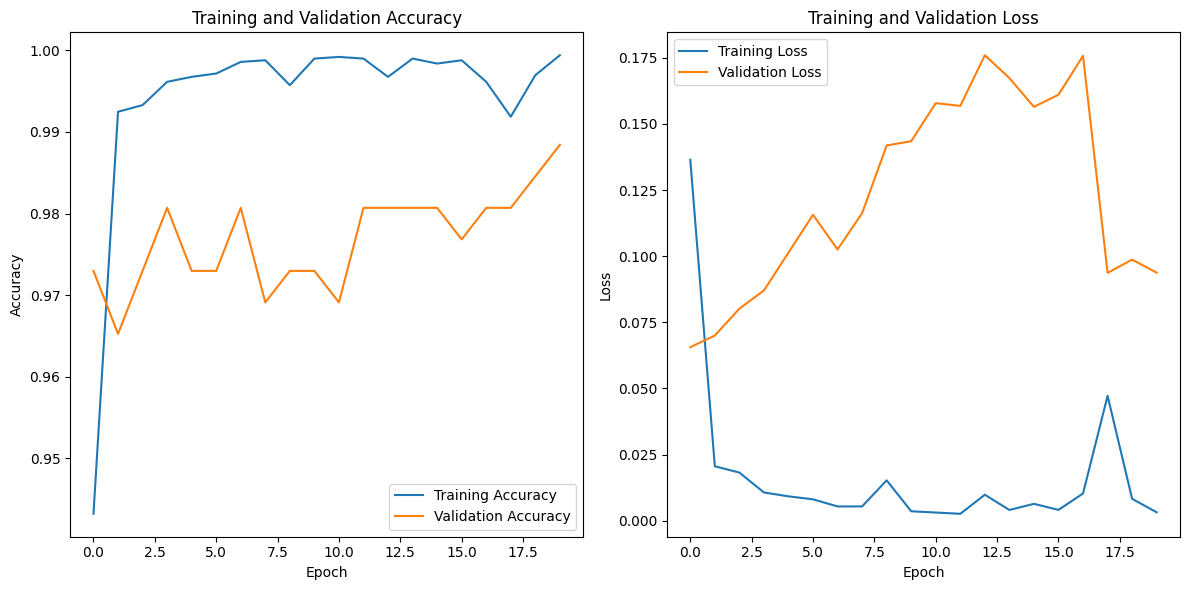

In [ ]:
Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

main_dataset_train, main_dataset_test, main_predication_train, main_predication_test = train_test_split(Main_dataset, Main_predication_dataset, test_size=0.05, random_state=101)

scaler = StandardScaler()
Main_train = scaler.fit_transform(main_dataset_train)
Main_test = scaler.transform(main_dataset_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(Main_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(Main_train, main_predication_train, epochs=20, batch_size=32, validation_data=(Main_test, main_predication_test), verbose=1)

main_trained = (model.predict(Main_test) > 0.5).astype(int)

conf_matrix = confusion_matrix(main_predication_test, main_trained)
f1 = f1_score(main_predication_test, main_trained)
class_report = classification_report(main_predication_test, main_trained)

print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:", f1)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 253ms/step - accuracy: 0.6996 - loss: 0.6207 - val_accuracy: 0.7169 - val_loss: 0.5953
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 31s 242ms/step - accuracy: 0.7097 - loss: 0.6046 - val_accuracy: 0.7169 - val_loss: 0.5879
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - accuracy: 0.7046 - loss: 0.6034 - val_accuracy: 0.7295 - val_loss: 0.5800
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 244ms/step - accuracy: 0.7128 - loss: 0.6008 - val_accuracy: 0.7169 - val_loss: 0.5964
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.7109 - loss: 0.6043 - val_accuracy: 0.7169 - val_loss: 0.5958
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.7124 - loss: 0.6029 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.7177 - loss: 0.5978 - val_accuracy: 0.7169 - val_loss: 0.5977
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 42s 260ms/step - accuracy: 0.7093 - loss: 0.6059 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[742   0]
 [293   0]]

F1 Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       742
           1       0.00      0.00      0.00       293

    accuracy                           0.72      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.51      0.72      0.60      1035



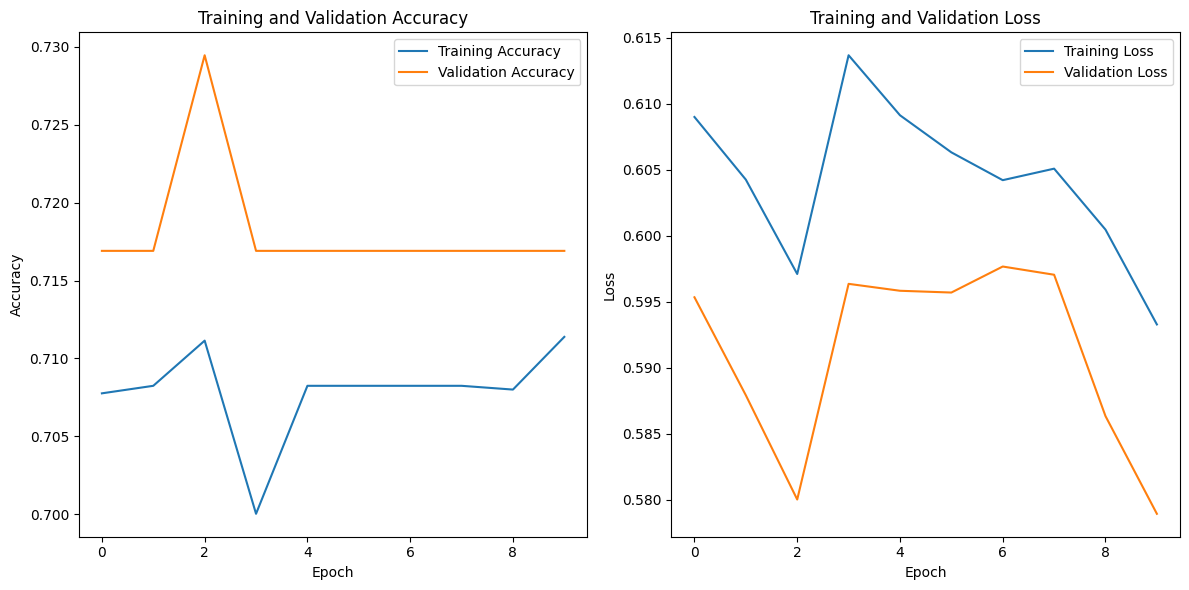

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

main_dataset_train, main_dataset_test, main_predication_train, main_predication_test = train_test_split(Main_dataset, Main_predication_dataset, test_size=0.2, random_state=56)

scaler = StandardScaler()
Main_train = scaler.fit_transform(main_dataset_train)
Main_test = scaler.transform(main_dataset_test)

# Model Architecture
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),  # Embedding layer
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM
    Dropout(0.2),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(Main_train, main_predication_train, epochs=10, batch_size=32, validation_data=(Main_test, main_predication_test), verbose=1)
main_trained = (model.predict(Main_test) > 0.5).astype(int)

conf_matrix = confusion_matrix(main_predication_test, main_trained)
f1 = f1_score(main_predication_test, main_trained)
class_report = classification_report(main_predication_test, main_trained)

print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:", f1)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()